<h1> Sistemas Inteligentes </h1>
<h1> Práctica de Aprendizaje Supervisado </h1>

En esta práctica vamos a ver cómo se hace el entrenamiento de un método de aprendizaje supervisado en la librería scikit learn para python.

Las tareas a realizar son:
-  Cargar el conjunto de datos
-  Preparar los conjuntos de entrenamiento y prueba
-  Probar el modelo construido con un conjunto de prueba
-  Aplicar métricas de desempeño para evaluar el desempeño del modelo

Mayo de 2020 <br/>
Autor: G. Alvarez

In [1]:
# Documentación
# X_Train : los datos con los que se va entrenar el modelo
# y_train : Las respuestas de ese conjunto de datos (X_Train)
# X_test : son un conjunto de datos diferente para probar el modelo
# y_test : es la respuesta de ese conjunto de datos diferente

In [2]:
# GLOBAR VARIABLES
J = 4 # Número de algoritmos trabajando
M = 3 # Número de métricas trabajando
N = 5 # Número de iteraciones para ejecutar los algoritmos
INDI_METRI = [[] for y in range(M * J)] # Matri con indicadores de las métricas

In [3]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
#data

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [5]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

 <=50K    24720
 >50K      7841
Name: C, dtype: int64


Las actividades siguientes corresponden al preprocesamiento de los datos para poderlos utilizar en el entrenamiento. Esta es una etapa importante y necesaria, a continuación se muestra la forma cómo se hace, aunque el propósito de la práctica tiene que ver más con la realización del entrenamiento, por lo que no se explicará en detalle.

In [6]:
# Eliminar los registros que tienen más de 2 datos faltantes
data = data.dropna(axis = 0, thresh = 13)
print(data.shape)

# Reemplazar los datos faltantes por la moda en los atributos Workclass, Occupation, Country
data.Workclass.fillna(data.Workclass.mode()[0], inplace=True)
data.Occupation.fillna(data.Workclass.mode()[0], inplace=True)
data.Country.fillna(data.Workclass.mode()[0], inplace=True)

# Convertir los atributos categóricos a escala numérica
# Esto modifica los valores de todas las columnas, incluso las numéricas
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform) 

# Balanceo entre clases
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal.shape

(32534, 15)


(15674, 15)

In [7]:
# Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
# Cuando finalice la depuración recordar quitar el parámetro random_state.
X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C'], test_size=0.4, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (9404, 14)
X_test: (6270, 14)
y_train: (9404,)
y_test: (6270,)


In [35]:
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def SVM_FUN(X_train, X_test, y_train, y_test):
    # Se crea el clasificador base
    clf = SVC()

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = [{'kernel': ['rbf', 'sigmoid'], 
    #parameter_space = [{'kernel': ['rbf'], 
                         'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100]
                        }]

    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se identifican los parametros que producen el mejor modelo
    print("Mejores parametros:")
    print(clf.best_params_)

    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)

    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando valores de las metricas a la matriz
    INDI_METRI[0].append(pre)       # Presición
    INDI_METRI[1].append(rec)       # Recall
    INDI_METRI[2].append(f1Score)   # F1 Score
    
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [39]:
#Punto 2
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def ArbolDesicion(profundidadArbol, X_train, X_test, y_train, y_test):
    # Clasificador de arbol de desiciones
    arbol = DecisionTreeClassifier()
    
    # Entrenamiento del modelo
    arbol.fit(X_train, y_train)
    
    # Calculo de score en el modelo de test
    scoTest = arbol.score(X_test, y_test)
    
    # Calculo de score en el modelo de entrenamiento
    scoTrain = arbol.score(X_train, y_train)
    
    # Predicción
    pred = arbol.predict(X_test)
    
    # Matriz de confusión 
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión sin RE AJUSTE")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando valores de las metricas a la matriz
    INDI_METRI[3].append(pre)       # Presición
    INDI_METRI[4].append(rec)       # Recall
    INDI_METRI[5].append(f1Score)   # F1 Score
    
    print("/----SIN RE AJUSTE----/")
    print("Score de test: ", scoTest)
    print("Score de train: ", scoTrain)
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    # Re Ajuste del arbol con el número de profundidad máximo
    arbol = DecisionTreeClassifier(max_depth=profundidadArbol)
    
    # Entrenamiento del modelo con Re Ajuste
    arbol.fit(X_train, y_train)
    
     # Calculo de score en el modelo de test con Re Ajuste
    scoTest = arbol.score(X_test, y_test)
    
    # Calculo de score en el modelo de entrenamiento con Re Ajuste
    scoTrain = arbol.score(X_train, y_train)
    
    # Matriz de confusión con RE AJUSTE 
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión con RE AJUSTE")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando valores de las metricas a la matriz
    INDI_METRI[6].append(pre)       # Presición
    INDI_METRI[7].append(rec)       # Recall
    INDI_METRI[8].append(f1Score)   # F1 Score
    
    print("/-----CON RE AJUSTE-----/")
    print("Score de test: ", scoTest)
    print("Score de train: ", scoTrain)
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
    auc = metrics.roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [37]:
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def RegresionLogistica(X_train, X_test, y_train, y_test):
    # Se escalan todos los datos
    escalar = StandardScaler()
    X_train = escalar.fit_transform(X_train)
    X_test = escalar.transform(X_test)
    
    # Entrenamiento de los modelos
    algoritmo = LogisticRegression()
    
    algoritmo.fit(X_train,y_train)
    
    # Se realiza una predicción
    y_pred = algoritmo.predict(X_test)
    
    # Matriz de confusión 
    mat = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión")
    print(mat)
    
    # Metricas
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1Score = f1_score(y_test,y_pred)
    
    # Anexando valores de las metricas a la matriz
    INDI_METRI[9].append(pre)        # Presición
    INDI_METRI[10].append(rec)       # Recall
    INDI_METRI[11].append(f1Score)   # F1 Score
    
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, y_pred))
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

/-------------------------------------/
Iteracion:  1
SVM
...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[[2149  960]
 [ 906 2255]]
Precision:  0.7013996889580093
Recall:     0.713381841189497
F1score:    0.7073400250941029
Reporte               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3109
           1       0.70      0.71      0.71      3161

    accuracy                           0.70      6270
   macro avg       0.70      0.70      0.70      6270
weighted avg       0.70      0.70      0.70      6270



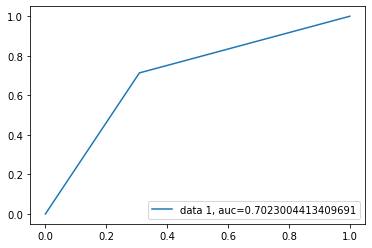

ARBOL DE DECISIÓN
...
Matriz de confusión sin RE AJUSTE
[[2374  735]
 [ 727 2434]]
/----SIN RE AJUSTE----/
Score de test:  0.7668261562998405
Score de train:  1.0
Precision:  0.7680656358472704
Recall:     0.7700094906675102
F1score:    0.7690363349131121


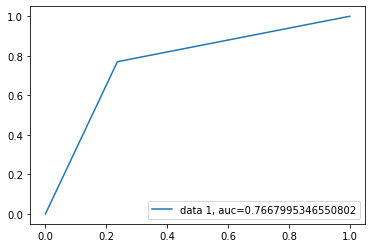

Matriz de confusión con RE AJUSTE
[[2374  735]
 [ 727 2434]]
/-----CON RE AJUSTE-----/
Score de test:  0.7792663476874003
Score de train:  0.7803062526584432
Precision:  0.7680656358472704
Recall:     0.7700094906675102
F1score:    0.7690363349131121


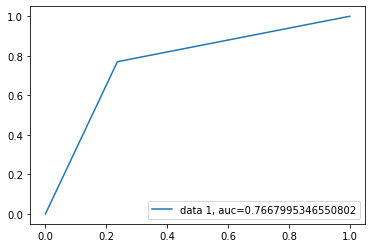

REGRESIÓN LOGISTICA
...
Matriz de confusión
[[2384  725]
 [ 707 2454]]
Precision:  0.7719408619062599
Recall:     0.7763366023410313
F1score:    0.7741324921135646
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3109
           1       0.77      0.78      0.77      3161

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



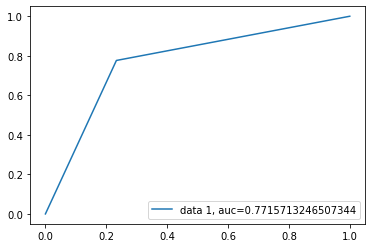

/-------------------------------------/
Iteracion:  2
SVM
...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[[2149  960]
 [ 906 2255]]
Precision:  0.7013996889580093
Recall:     0.713381841189497
F1score:    0.7073400250941029
Reporte               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3109
           1       0.70      0.71      0.71      3161

    accuracy                           0.70      6270
   macro avg       0.70      0.70      0.70      6270
weighted avg       0.70      0.70      0.70      6270



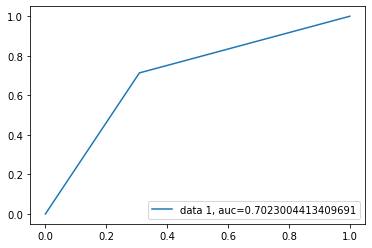

ARBOL DE DECISIÓN
...
Matriz de confusión sin RE AJUSTE
[[2372  737]
 [ 738 2423]]
/----SIN RE AJUSTE----/
Score de test:  0.7647527910685805
Score de train:  1.0
Precision:  0.7667721518987342
Recall:     0.7665295792470737
F1score:    0.7666508463850656


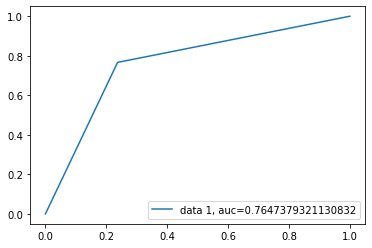

Matriz de confusión con RE AJUSTE
[[2372  737]
 [ 738 2423]]
/-----CON RE AJUSTE-----/
Score de test:  0.7792663476874003
Score de train:  0.7803062526584432
Precision:  0.7667721518987342
Recall:     0.7665295792470737
F1score:    0.7666508463850656


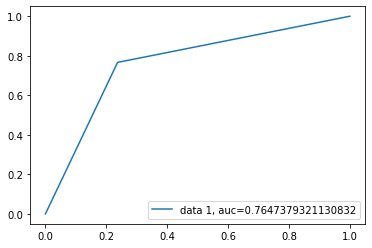

REGRESIÓN LOGISTICA
...
Matriz de confusión
[[2384  725]
 [ 707 2454]]
Precision:  0.7719408619062599
Recall:     0.7763366023410313
F1score:    0.7741324921135646
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3109
           1       0.77      0.78      0.77      3161

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



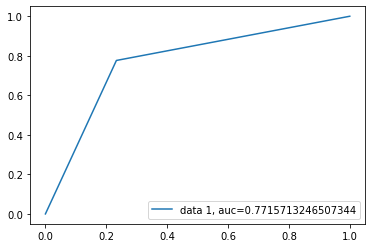

/-------------------------------------/
Iteracion:  3
SVM
...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[[2149  960]
 [ 906 2255]]
Precision:  0.7013996889580093
Recall:     0.713381841189497
F1score:    0.7073400250941029
Reporte               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3109
           1       0.70      0.71      0.71      3161

    accuracy                           0.70      6270
   macro avg       0.70      0.70      0.70      6270
weighted avg       0.70      0.70      0.70      6270



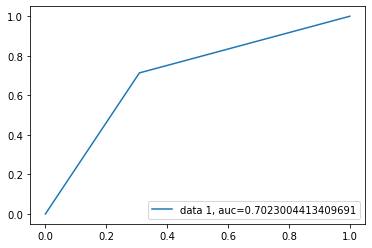

ARBOL DE DECISIÓN
...
Matriz de confusión sin RE AJUSTE
[[2348  761]
 [ 729 2432]]
/----SIN RE AJUSTE----/
Score de test:  0.7623604465709729
Score de train:  1.0
Precision:  0.7616661446915127
Recall:     0.7693767795001581
F1score:    0.7655020459553037


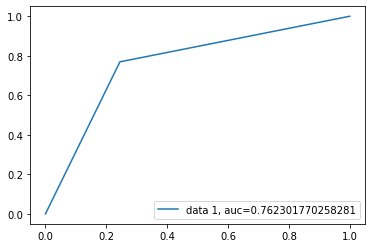

Matriz de confusión con RE AJUSTE
[[2348  761]
 [ 729 2432]]
/-----CON RE AJUSTE-----/
Score de test:  0.7792663476874003
Score de train:  0.7803062526584432
Precision:  0.7616661446915127
Recall:     0.7693767795001581
F1score:    0.7655020459553037


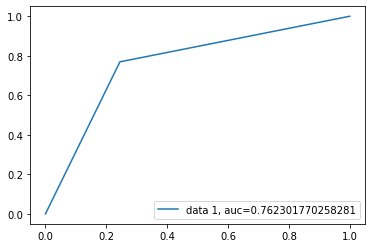

REGRESIÓN LOGISTICA
...
Matriz de confusión
[[2384  725]
 [ 707 2454]]
Precision:  0.7719408619062599
Recall:     0.7763366023410313
F1score:    0.7741324921135646
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3109
           1       0.77      0.78      0.77      3161

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



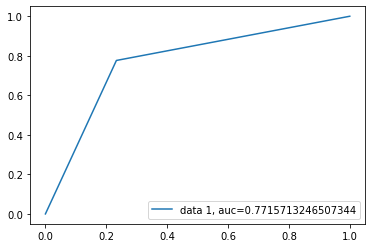

/-------------------------------------/
Iteracion:  4
SVM
...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[[2149  960]
 [ 906 2255]]
Precision:  0.7013996889580093
Recall:     0.713381841189497
F1score:    0.7073400250941029
Reporte               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3109
           1       0.70      0.71      0.71      3161

    accuracy                           0.70      6270
   macro avg       0.70      0.70      0.70      6270
weighted avg       0.70      0.70      0.70      6270



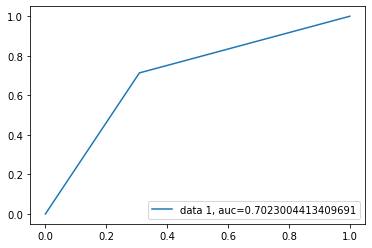

ARBOL DE DECISIÓN
...
Matriz de confusión sin RE AJUSTE
[[2353  756]
 [ 752 2409]]
/----SIN RE AJUSTE----/
Score de test:  0.7594896331738437
Score de train:  1.0
Precision:  0.7611374407582938
Recall:     0.762100601075609
F1score:    0.7616187164084729


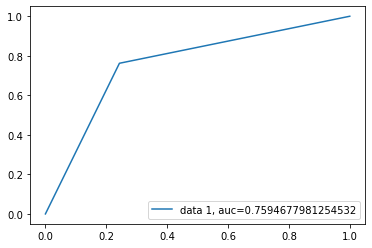

Matriz de confusión con RE AJUSTE
[[2353  756]
 [ 752 2409]]
/-----CON RE AJUSTE-----/
Score de test:  0.7792663476874003
Score de train:  0.7803062526584432
Precision:  0.7611374407582938
Recall:     0.762100601075609
F1score:    0.7616187164084729


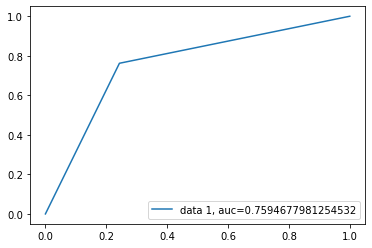

REGRESIÓN LOGISTICA
...
Matriz de confusión
[[2384  725]
 [ 707 2454]]
Precision:  0.7719408619062599
Recall:     0.7763366023410313
F1score:    0.7741324921135646
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3109
           1       0.77      0.78      0.77      3161

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



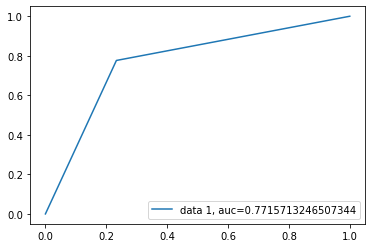

/-------------------------------------/
Iteracion:  5
SVM
...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[[2149  960]
 [ 906 2255]]
Precision:  0.7013996889580093
Recall:     0.713381841189497
F1score:    0.7073400250941029
Reporte               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3109
           1       0.70      0.71      0.71      3161

    accuracy                           0.70      6270
   macro avg       0.70      0.70      0.70      6270
weighted avg       0.70      0.70      0.70      6270



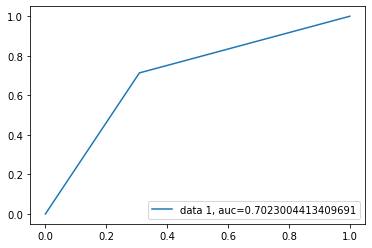

ARBOL DE DECISIÓN
...
Matriz de confusión sin RE AJUSTE
[[2352  757]
 [ 717 2444]]
/----SIN RE AJUSTE----/
Score de test:  0.7649122807017544
Score de train:  1.0
Precision:  0.7635114026866604
Recall:     0.7731730465042708
F1score:    0.7683118516189877


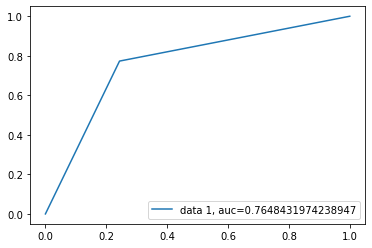

Matriz de confusión con RE AJUSTE
[[2352  757]
 [ 717 2444]]
/-----CON RE AJUSTE-----/
Score de test:  0.7792663476874003
Score de train:  0.7803062526584432
Precision:  0.7635114026866604
Recall:     0.7731730465042708
F1score:    0.7683118516189877


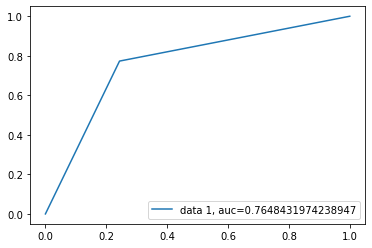

REGRESIÓN LOGISTICA
...
Matriz de confusión
[[2384  725]
 [ 707 2454]]
Precision:  0.7719408619062599
Recall:     0.7763366023410313
F1score:    0.7741324921135646
Reporte               precision    recall  f1-score   support

           0       0.77      0.77      0.77      3109
           1       0.77      0.78      0.77      3161

    accuracy                           0.77      6270
   macro avg       0.77      0.77      0.77      6270
weighted avg       0.77      0.77      0.77      6270



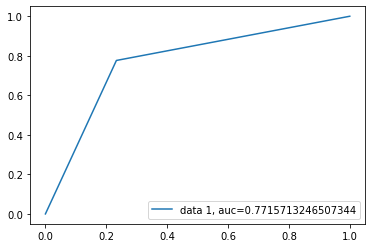

/--------PROMEDIOS----------/
* Resultados SVM
    Promedio Recall después de 5 iteraciones: 0.7034044565294626
    Promedio Presición después de 5 iteraciones: 0.7090205738113161
    Promedio F1 después de 5 iteraciones: 0.7061676422695974
    Desviación estándar Recall después de 5 iteraciones: 0.005709698482661322
    Desviación estándar Presición después de 5 iteraciones: 0.007694742965887093
    Desviación estándar F1 después de 5 iteraciones: 0.0046507447075181075
* Resultados ARBOLES DE DECISIÓN
    Promedio Recall después de 5 iteraciones: 0.7636695069452409
    Promedio Presición después de 5 iteraciones: 0.7695686792908131
    Promedio F1 después de 5 iteraciones: 0.7666003899424669
    Desviación estándar Recall después de 5 iteraciones: 0.005330733979054316
    Desviación estándar Presición después de 5 iteraciones: 0.003854121341434465
    Desviación estándar F1 después de 5 iteraciones: 0.00401916177885534
* Resultados ARBOLES DE DECISIÓN CON RE AJUSTE
    Promedio Recall

In [41]:
from numpy import average
from numpy import std

def main(sizeTest):
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C']
                                                        , test_size=sizeTest)
    for i in range(N): # Llamado del agente para revisar las metricas
        print("/-------------------------------------/")
        print("Iteracion: ", i + 1)
        print("SVM")
        print("...")
        SVM_FUN(X_train, X_test, y_train, y_test)
        print("ARBOL DE DECISIÓN")
        print("...")
        ArbolDesicion(3, X_train, X_test, y_train, y_test)
        print("REGRESIÓN LOGISTICA")
        print("...")
        RegresionLogistica(X_train, X_test, y_train, y_test)
        
    print("/--------PROMEDIOS----------/")
    print("* Resultados SVM")
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N, average(INDI_METRI[0])))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N, average(INDI_METRI[1])))
    print("    Promedio F1 después de {0} iteraciones: {1}".format(N,average(INDI_METRI[2])))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(INDI_METRI[0])))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(INDI_METRI[1])))
    print("    Desviación estándar F1 después de {0} iteraciones: {1}".format(N,std(INDI_METRI[2])))
    print("* Resultados ARBOLES DE DECISIÓN")
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(INDI_METRI[3])))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(INDI_METRI[4])))
    print("    Promedio F1 después de {0} iteraciones: {1}".format(N,average(INDI_METRI[5])))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(INDI_METRI[3])))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(INDI_METRI[4])))
    print("    Desviación estándar F1 después de {0} iteraciones: {1}".format(N,std(INDI_METRI[5])))
    print("* Resultados ARBOLES DE DECISIÓN CON RE AJUSTE")
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(INDI_METRI[6])))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(INDI_METRI[7])))
    print("    Promedio F1 después de {0} iteraciones: {1}".format(N,average(INDI_METRI[8])))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(INDI_METRI[6])))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(INDI_METRI[7])))
    print("    Desviación estándar F1 después de {0} iteraciones: {1}".format(N,std(INDI_METRI[8])))
    print("* Resultados REGRESIÓN LOGISTICA")
    print("    Promedio Recall después de {0} iteraciones: {1}".format(N,average(INDI_METRI[9])))
    print("    Promedio Presición después de {0} iteraciones: {1}".format(N,average(INDI_METRI[10])))
    print("    Promedio F1 después de {0} iteraciones: {1}".format(N,average(INDI_METRI[11])))
    print("    Desviación estándar Recall después de {0} iteraciones: {1}".format(N, std(INDI_METRI[9])))
    print("    Desviación estándar Presición después de {0} iteraciones: {1}".format(N, std(INDI_METRI[10])))
    print("    Desviación estándar F1 después de {0} iteraciones: {1}".format(N,std(INDI_METRI[11])))
    
main(0.4)
#X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C']
 #                                                       , test_size=0.4)
#SVM_FUN(X_train, X_test, y_train, y_test)
#ArbolDesicion(3, X_train, X_test, y_train, y_test)
#RegresionLogistica(X_train, X_test, y_train, y_test)

<h1> Actividades a realizar a partir de este script básico: </h1>
1.  Implementar el método holdout para obtener unas métricas de desempeño más confiables. Hacer 5 iteraciones  de las etapas de: partición de los datos - entrenamiento - prueba - calculo de metricas. No olvidar liberar la semilla del generador de números aleatorios.
<br></br>
2.  Adicionar dos métodos para poder comparar su desempeño, los métodos a adicionar son: árbol de decisiones y clasificacador por regresión logística.
<br></br>
3.  Mostrar los resultados comparativos gráficamente, incluyendo la visualización de las curvas ROC por cada método y el valor del área bajo la curva.